In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
from sklearn.model_selection import KFold
from matplotlib.pyplot import plot
warnings.filterwarnings('ignore')
%matplotlib inline

In [50]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LassoCV
from sklearn import svm
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from keras import metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import keras.backend as K
from sklearn.preprocessing import Imputer
# ros = RandomOverSampler(random_state=0)
ros = SMOTE(random_state=0)
#ros = ADASYN(random_state=0)

In [3]:
df_full = pd.read_csv("./kag_risk_factors_cervical_cancer.csv")
df_fullna = df_full.replace('?', np.nan)
df_full.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4,15,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
1,15,1,14,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
2,34,1,?,1,0,0,0,0,0,0,...,?,?,0,0,0,0,0,0,0,0
3,52,5,16,4,1,37,37,1,3,0,...,?,?,1,0,1,0,0,0,0,0
4,46,3,21,4,0,0,0,1,15,0,...,?,?,0,0,0,0,0,0,0,0


In [4]:
df = df_fullna  #making temporary save
df = df.convert_objects(convert_numeric=True) #turn data into numeric type for computation
df.head()

,Age,Number of sexual partners,First sexual intercourse,Num of pregnancies,Smokes,Smokes (years),Smokes (packs/year),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,...,STDs: Time since first diagnosis,STDs: Time since last diagnosis,Dx:Cancer,Dx:CIN,Dx:HPV,Dx,Hinselmann,Schiller,Citology,Biopsy
0,18,4.0,15.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
1,15,1.0,14.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
2,34,1.0,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0
3,52,5.0,16.0,4.0,1.0,37.0,37.0,1.0,3.0,0.0,...,NaN,NaN,1,0,1,0,0,0,0,0
4,46,3.0,21.0,4.0,0.0,0.0,0.0,1.0,15.0,0.0,...,NaN,NaN,0,0,0,0,0,0,0,0


In [5]:
# Impute median values for columns with missing data
imputer = Imputer(strategy='median')
imp_df = pd.DataFrame(imputer.fit_transform(np.array(df)))
imp_df.columns = df.columns
imp_df.index = df.index
data = imp_df

In [6]:
tcol = np.array(data[['Hormonal Contraceptives', 'IUD', 'STDs', 'Smokes', 'Dx:Cancer', 'Dx:HPV', 'Dx', 'Dx:CIN']])#, axis=1)
t = np.sum(tcol, axis = 1)
dat = t.reshape((-1,1))
testcol = np.array(data[['Dx:Cancer']]) + np.array(data[['Dx:HPV']]) + np.array(data[['Dx']]) + np.array(data[['Dx:CIN']])
data.loc[:,'Testcol'] = pd.Series(t.reshape((858,)), index=data.index)

In [7]:
dat = np.array(data[['Testcol','STDs (number)','STDs: Number of diagnosis']])

## Logistic Regression

FOLD 0
0.14870215574131107


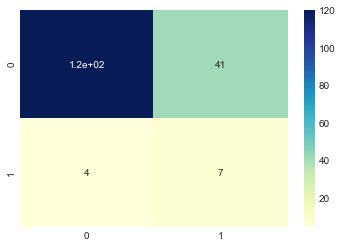

FOLD 1
0.2002066649444587


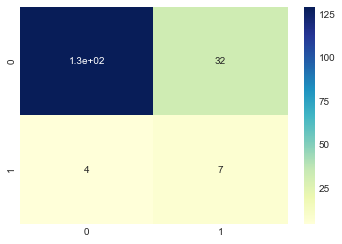

FOLD 2
0.09050664043285772


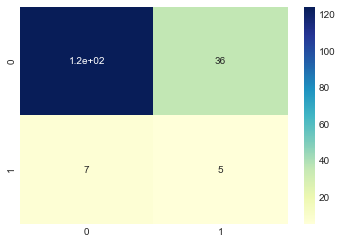

FOLD 3
0.13991769547325106


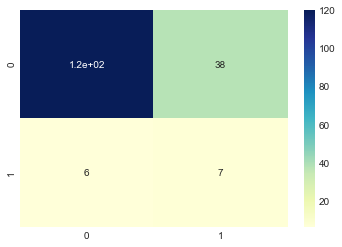

FOLD 4
0.04493526275704496


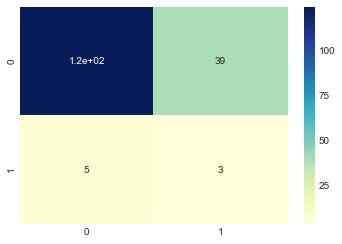

average cohen_kappa_score is 0.12485368386978471
average accuracy is 0.752889976880185
average recall is 0.5205710955710956


In [25]:
clf = LogisticRegression()
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)
recall = np.zeros(k_folds)
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_index = 0
drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
label = np.array(data['Biopsy'])
for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
    train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)
    
#     minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
#     train_data_scaled = minmax_scale.fit_transform(train_data_resampled)
#     test_data_scaled = minmax_scale.transform(test_data)
    scaler = StandardScaler()
    train_data_scaled = scaler.fit_transform(train_data_resampled)
    test_data_scaled = scaler.transform(test_data)
    
    clf.fit(train_data_scaled, train_label_resampled)
    predicted = clf.predict(test_data_scaled)
    print(cohen_kappa_score(test_label, predicted))
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    recall[fold_index] = recall_score(test_label, predicted)
    acc[fold_index] = clf.score(test_data_scaled, test_label)
    
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average recall is {}".format(np.mean(recall)))  

## Ridge classifier

FOLD 0
0.15333054042731453


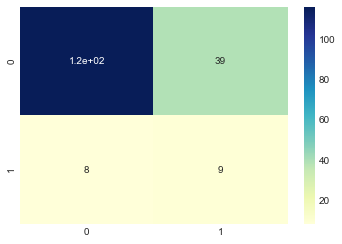

FOLD 1
0.23720223010643682


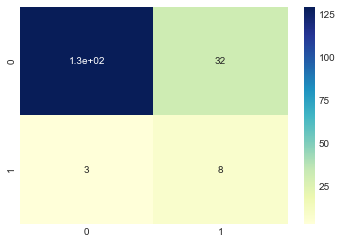

FOLD 2
0.12326227988878591


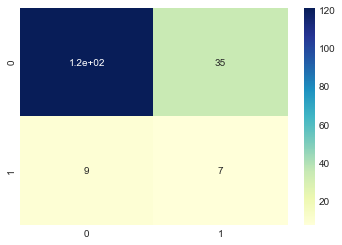

FOLD 3
0.08970438328236496


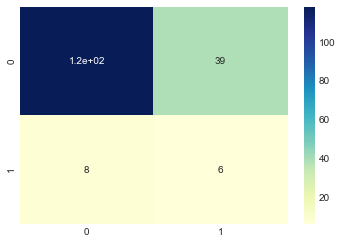

FOLD 4
0.03833352461838624


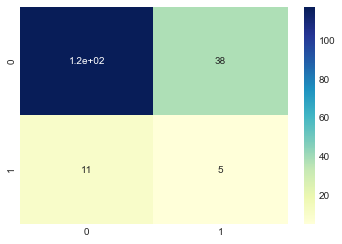

average cohen_kappa_score is 0.1283665916646577
average accuracy is 0.7412076703386372
average recall is 0.48705118411000764


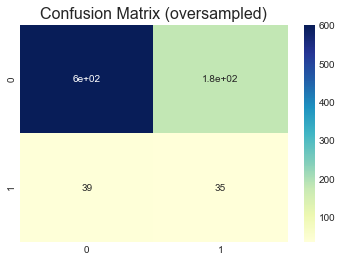

In [29]:
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)
recall = np.zeros(k_folds)
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_index = 0
rid = RidgeClassifier()
#drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
label = np.array(df['Schiller'])
test_label_all = []
predicted_all = []

for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
    train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = minmax_scale.fit_transform(train_data_resampled)
    test_data_scaled = minmax_scale.transform(test_data)
    
    rid.fit(train_data_scaled, train_label_resampled)
    predicted = rid.predict(test_data_scaled)
    print(cohen_kappa_score(test_label, predicted))
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    recall[fold_index] = recall_score(test_label, predicted)
    acc[fold_index] = rid.score(test_data_scaled, test_label)
    test_label_all.append(test_label)
    predicted_all.append(predicted)
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average recall is {}".format(np.mean(recall)))
conf = confusion_matrix(np.hstack(test_label_all).tolist(), np.hstack(predicted_all).tolist())
tag = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
plt.title("Confusion Matrix (oversampled)", fontsize=16)
plt.show()

## LASSO

FOLD 0
0.06859205776173294


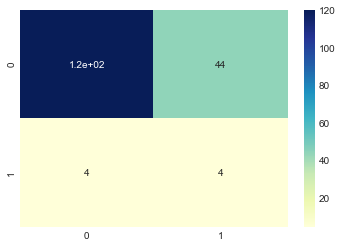

FOLD 1
0.18528838116466995


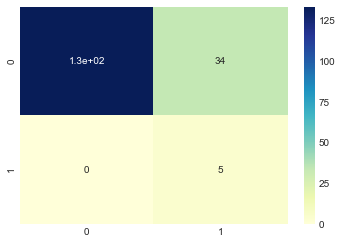

FOLD 2
-0.009888751545117369


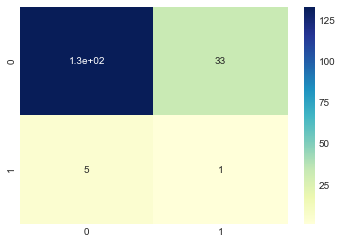

FOLD 3
-0.051977401129943424


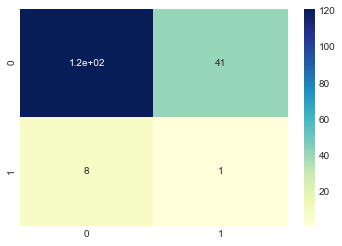

FOLD 4
0.01031706089582285


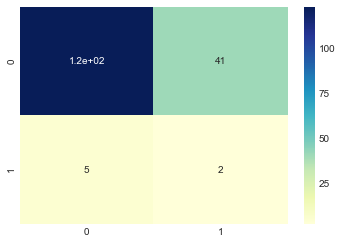

average cohen_kappa_score is 0.04046626942943299
average accuracy is 0.7493540051679586
average recall is 0.41269841269841273


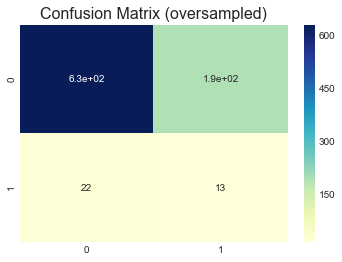

In [34]:
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)
recall = np.zeros(k_folds)
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_index = 0
lascv = LassoCV()
#drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
label = np.array(df['Hinselmann'])
test_label_all = []
predicted_all = []

for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
    train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)
    
    minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
    train_data_scaled = minmax_scale.fit_transform(train_data_resampled)
    test_data_scaled = minmax_scale.transform(test_data)
    
    lascv.fit(train_data_scaled, train_label_resampled)
    predicted = np.round(lascv.predict(test_data_scaled))
    print(cohen_kappa_score(test_label, predicted))
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    recall[fold_index] = recall_score(test_label, predicted)
    acc[fold_index] = accuracy_score(test_label, predicted)
    test_label_all.append(test_label)
    predicted_all.append(predicted)
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average recall is {}".format(np.mean(recall)))
conf = confusion_matrix(np.hstack(test_label_all).tolist(), np.hstack(predicted_all).tolist())
tag = ["0","1"]
sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
plt.title("Confusion Matrix (oversampled)", fontsize=16)
plt.show()

## mlp(final)

FOLD 0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_389 (Dense)            (None, 20)                80        
_________________________________________________________________
dense_390 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_391 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_392 (Dense)            (None, 1)                 6         
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 4s - loss: 0.6934 - acc: 0.5000
Epoch 2/100
 - 0s - loss: 0.6934 - acc: 0.5000
Epoch 3/100
 - 0s - loss: 0.6933 - acc: 0.5000
Epoch 4/100
 - 0s - loss: 0.6933 - acc: 0.5000
Epoch 5/100
 - 0s - loss: 0.6932 - acc: 0.5000
Epoch 6/100
 - 0s - loss: 0.6

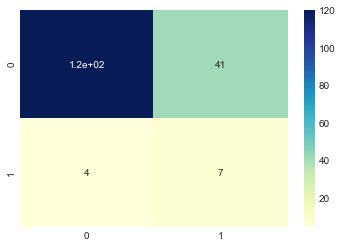

FOLD 1
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_393 (Dense)            (None, 20)                80        
_________________________________________________________________
dense_394 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_395 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_396 (Dense)            (None, 1)                 6         
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 5s - loss: 0.6934 - acc: 0.4720
Epoch 2/100
 - 0s - loss: 0.6933 - acc: 0.4751
Epoch 3/100
 - 0s - loss: 0.6932 - acc: 0.4813
Epoch 4/100
 - 0s - loss: 0.6932 - acc: 0.4945
Epoch 5/100
 - 0s - loss: 0.6933 - acc: 0.4735
Epoch 6/100
 - 0s - loss: 0.6

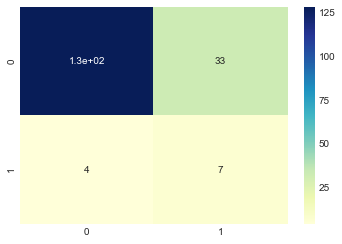

FOLD 2
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_397 (Dense)            (None, 20)                80        
_________________________________________________________________
dense_398 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_399 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_400 (Dense)            (None, 1)                 6         
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 5s - loss: 0.6932 - acc: 0.5000
Epoch 2/100
 - 0s - loss: 0.6933 - acc: 0.4829
Epoch 3/100
 - 0s - loss: 0.6932 - acc: 0.4813
Epoch 4/100
 - 0s - loss: 0.6932 - acc: 0.5000
Epoch 5/100
 - 0s - loss: 0.6933 - acc: 0.5000
Epoch 6/100
 - 0s - loss: 0.6

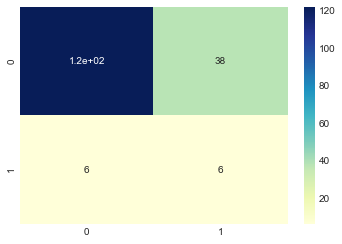

FOLD 3
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_401 (Dense)            (None, 20)                80        
_________________________________________________________________
dense_402 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_403 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_404 (Dense)            (None, 1)                 6         
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 5s - loss: 0.6934 - acc: 0.4798
Epoch 2/100
 - 0s - loss: 0.6932 - acc: 0.4783
Epoch 3/100
 - 0s - loss: 0.6932 - acc: 0.5000
Epoch 4/100
 - 0s - loss: 0.6932 - acc: 0.4891
Epoch 5/100
 - 0s - loss: 0.6932 - acc: 0.4891
Epoch 6/100
 - 0s - loss: 0.6

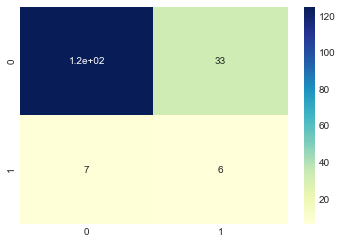

FOLD 4
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_405 (Dense)            (None, 20)                80        
_________________________________________________________________
dense_406 (Dense)            (None, 10)                210       
_________________________________________________________________
dense_407 (Dense)            (None, 5)                 55        
_________________________________________________________________
dense_408 (Dense)            (None, 1)                 6         
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
 - 4s - loss: 0.6933 - acc: 0.5000
Epoch 2/100
 - 0s - loss: 0.6933 - acc: 0.5000
Epoch 3/100
 - 0s - loss: 0.6934 - acc: 0.4828
Epoch 4/100
 - 0s - loss: 0.6933 - acc: 0.5031
Epoch 5/100
 - 0s - loss: 0.6933 - acc: 0.4750
Epoch 6/100
 - 0s - loss: 0.6

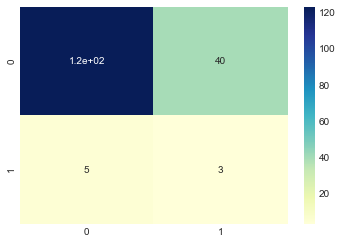

average cohen_kappa_score is 0.12673780395452644
average accuracy is 0.754073167069338
average recall is 0.5218531468531469


In [54]:
k_folds = 5
cohen_kappa = np.zeros(k_folds)
acc = np.zeros(k_folds)
recall = np.zeros(k_folds)
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)
fold_index = 0
#drop_cols = ["Hinselmann", "Schiller", "Citology", "Biopsy"]
label = np.array(data['Biopsy'])
for train_indices, test_indices in kf.split(dat):
    print ("FOLD {}".format(fold_index))
    
    train_data, test_data = dat[train_indices], dat[test_indices]
    train_label, test_label = label[train_indices], label[test_indices]
    train_data_resampled, train_label_resampled = ros.fit_sample(train_data, train_label)
    
#     minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
#     train_data_scaled = minmax_scale.fit_transform(train_data_resampled)
#     test_data_scaled = minmax_scale.transform(test_data)
    
    scaler = StandardScaler()
    train_data_scaled = scaler.fit_transform(train_data_resampled)
    test_data_scaled = scaler.transform(test_data)
    
    model = Sequential() 
    
    #Input layer
    model.add(Dense(units=20, 
                    input_dim=3, 
                    kernel_initializer='uniform', 
                    activation='sigmoid'))
    #model.add(Dropout(0.5))

    #Hidden layer 1
    model.add(Dense(units=10,  
                    kernel_initializer='uniform', 
                    activation='sigmoid'))
    #model.add(Dropout(0.5))

    #Hidden layer 2
    model.add(Dense(units=5,  
                    kernel_initializer='uniform', 
                    activation='sigmoid'))
    #model.add(Dropout(0.5))
    
    #Output layer
    model.add(Dense(units=1,
                    kernel_initializer='uniform', 
                    activation='sigmoid'))

    print(model.summary()) #for showing the structure and parameters

    # Defining how to measure performance
    model.compile(loss='binary_crossentropy',   
                  optimizer='adam', metrics=['accuracy'])

    # Train the model
    # Verbose=2, showing loss and accuracy change timely
    train_history = model.fit(x=train_data_scaled, y=train_label_resampled,  
                              validation_split=0, epochs=100, 
                              batch_size=30, verbose=2)   
    predicted = model.predict_classes(test_data_scaled)
    
    cohen_kappa[fold_index] = cohen_kappa_score(test_label, predicted)
    
    recall[fold_index] = recall_score(test_label, predicted)
    scores = model.evaluate(test_data_scaled, test_label)
    acc[fold_index] = scores[1]
    
    
    conf = confusion_matrix(test_label, predicted)
    tag = ["0","1"]
    sns.heatmap(conf, annot=True, xticklabels=tag, yticklabels=tag, cmap="YlGnBu")
    plt.show()
    fold_index += 1
print ("average cohen_kappa_score is {}".format(np.mean(cohen_kappa)))
print ("average accuracy is {}".format(np.mean(acc)))
print ("average recall is {}".format(np.mean(recall)))  